<a href="https://colab.research.google.com/github/Janeferdinant/500-AI-Machine-learning-Deep-learning-Computer-vision-NLP-Projects-with-code/blob/main/Word_Cloud_in_Python_for_beginners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'poetry:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F6776%2F81739%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240303%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240303T183841Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D163a788162b761ab8418199d38fd5d2be207498f280cf0e3440bef31c1fdd450da96671c412b63513fc58dfe45bff75cf423b61d68d9084f0de75fd76a09f8ff4c8500e2bc874911a83e638ad67e8fae6fbeaf6c88bbbcffc0eb2a5f247758135dba9eed20c081b77493029051710fd2317831bfd7f1773731e110691d9aa686bbf157abfe9ae1cd4640d70c4c95fba460601b87fe8bc2b9e5dffe6fcd6b4fdc6e618dfa645123bb1912f9e415f7f43d5128f2232534e8c0d2ccb5c7e65f3e02502e2a89a9b11f6f12db2166e14c78c76d24f0bfab21bb8c11a3a2cba123eb5f30f9f492b80a3ebd2bac07ed2a0a66ad7b61617706fed1f6b07c2a7c5ae4829f,disney-characters-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1383092%2F2294493%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240303%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240303T183841Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D98406a23755c26426841aad9997e38debc908b68efef6a0b9b5bdad74d7ca1d5d7a4ba77fb127a6393fc3aa500803b68cc977af5443f2f6cd9ec4f9393281a50b7ec8aca95482664e7bc5eaa63c396f3ec6b6307970f54c6c45244a3990e2c5266656281f21398a895c39d2fa96d61d3c84fe77e0a5eb8c5b5deda8a548dcdf63ee4a4a0f563f9047a8dc30e87d7f7f95b24910d714d747c9647032c94ad43df1af9ca687767b7fe1836eb418c650ecde25786a0b9cf9d91c57465ceb12a95d6ea71945b438b74e8e340648e34f1700529dd729275e4895650fc582a28af121b004d607a0f8148e1a7e8f07ede67eb0d3b567f082b1c0b10cf53d6a7bafbfec3,game-of-thronesgot:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1406127%2F2329568%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240303%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240303T183841Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D4bad647ff77ca7438057efd3a1110b88849dd37b3b6f181c576349a9548d0b3cc4ccd8bb7f17df3d26a1e49c6a874f65a3ad2c1294c3a9d7ff03515a80afb007c1b38444f422735d747641c4fa274a09b6a550251947053da32d8c7f01e8fcaff2e21b38508bbaec399e028ae9aaa9b6b4b50e0a618c9ba0decc4fd34c26841bd7411f154addf5d022b6223b1cc542a4f319adc18c6d998046d8ba2dd92e82c0566b35c57d1fccfaf566e440911ae7ff55620720876a926cf4bc381537b6367695242e30b9f3de4fd09896414a6aecc9635e49a8212a6ef5a5beca9e1a52c7907e603b48ac19111905d6aca5e499269e576abb79c255325557a2e748c0d4f116'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 2101791 bytes downloaded
Downloaded and uncompressed: poetry
[==================================================] 638733930 bytes downloaded
Downloaded and uncompressed: disney-characters-dataset
[==================================================] 2457 bytes downloaded
Downloaded and uncompressed: game-of-thronesgot
Data source import complete.


# Word Cloud in Python

A **word cloud** is a visually prominent presentation of “*keywords*” that appear frequently in text data. The rendering of keywords forms a cloud-like color picture, so that you can appreciate the main text data at a glance.<p>In Python, word cloud can be made with help of **wordcloud library**.<p>The core of the wordcloud library is the WordCloud class, and all functions are encapsulated in the WordCloud class. When using, you need to instantiate a **WordCloud** object, and call its **generate(text)** method to convert the text into a word cloud.

**Common parameters**


- **width**: word cloud image width, default 400 pixels

- **height**: word cloud image height default 200 pixels

- **background_color**: the background color of the word cloud image, the default is black

- *background_color=‘white’*

- **font_step**: the step interval to increase the font size, the default is 1

- **font_path**: specifies the font path, default None

- **mini_font_size**: minimum font size, default size 4

- **max_font_size**: maximum font size automatically adjusted according to height

- **max_words**: maximum number of words, default 200

- **stop_words**: words not displayed such as stop_words={“python”,“java”}

- The default value of Scale is 1, the larger the value, the higher the image density, the clearer the image

- **prefer_horizontal**: the default value is 0.90, floating-point type. Indicates that if it is not suitable horizontally, rotate to vertical

- **relative_scaling**: the default value is 0.5, floating point type. Set the reverse order of word frequency, the size multiple of the previous word relative to the next word.

- **mask**: specifies the word cloud shape picture, the default is rectangular

# Simple Word Cloud (default rectangle shape)

In [4]:
#Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

You can work with any datasets or text files.<br>First I will use text from a dataset.

In [5]:
# importing dataset into a dataframe
df = pd.read_csv("../input/game-of-thronesgot/game of thrones.csv")
# printing first five rows
df.head()

,No. overall,No. in season,Season,Title,Directed by,Written by,Novel(s) adapted,Original air date,U.S. viewers(millions),Imdb rating
0,1,1,1,"""Winter Is Coming""",Tim Van Patten,David Benioff & D. B. Weiss,A Game of Thrones,17-Apr-11,2.22,9.1
1,2,2,1,"""The Kingsroad""",Tim Van Patten,David Benioff & D. B. Weiss,A Game of Thrones,24-Apr-11,2.20,8.8
2,3,3,1,"""Lord Snow""",Brian Kirk,David Benioff & D. B. Weiss,A Game of Thrones,1-May-11,2.44,8.7
3,4,4,1,"""Cripples, Bastards, and Broken Things""",Brian Kirk,Bryan Cogman,A Game of Thrones,8-May-11,2.45,8.8
4,5,5,1,"""The Wolf and the Lion""",Brian Kirk,David Benioff & D. B. Weiss,A Game of Thrones,15-May-11,2.58,9.1


In [6]:
# creating the text variable
text1 = " ".join(title for title in df.Title)

So, the text variable contains a string made by joining all the titles

In [7]:
# Creating word_cloud with text as argument in .generate() method

word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                        width = 2048, height = 1080).generate(text1)
# saving the image
word_cloud1.to_file('got.png')

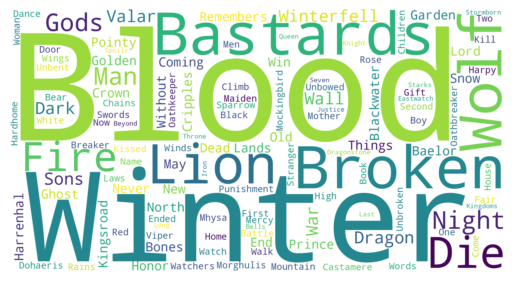

In [8]:
# Display the generated Word Cloud

plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

# Word Cloud with given picture shape

In [9]:
# importing libraries

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

Here, I used text from a file

In [10]:
# Reading text from a file
text2 = open('../input/poetry/disney.txt', 'r').read()

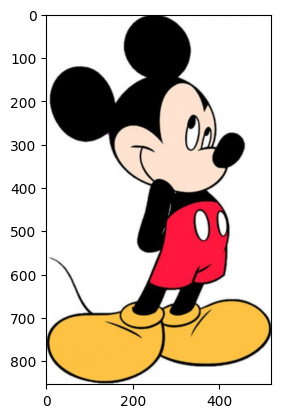

In [11]:
# word cloud will be made with the shape of this image

background_image = np.array(Image.open('../input/disney-characters-dataset/cartoon/test/mickey/28de32146d9bfb991d0e859fca65f012.jpg'))
plt.imshow(background_image)

In [12]:
# Creating word_cloud with text as argument in .generate() method
word_cloud2 = WordCloud(background_color = 'white',mask = background_image,
               width = 2048, height = 1080).generate(text2)

# font color matching the masked image
img_colors = ImageColorGenerator(background_image)
word_cloud2.recolor(color_func = img_colors)

#saving the image
word_cloud2.to_file('disney.png')

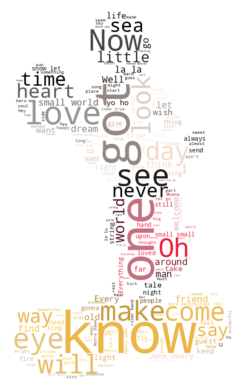

In [13]:
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

**Read more at**
- https://www.tutorialspoint.com/create-word-cloud-using-python
- https://www.geeksforgeeks.org/generating-word-cloud-python/

Please **upvote** if you like this notebook.<p>Thank You